In [4]:
import sys
sys.path

['',
 '/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python35.zip',
 '/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5',
 '/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/plat-darwin',
 '/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/lib-dynload',
 '/usr/local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/site-packages/IPython/extensions',
 '/Users/mehul/.ipython']

### Author - Mehul Ahuja

First we'll import the necessary libraries.

In [5]:
import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib
import requests
import bs4

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt  

The above line actually imports matplotlib....

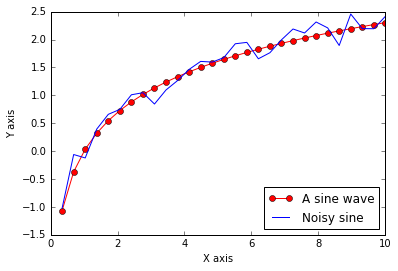

In [8]:
#equally divide 0-10 in 30 intervals
x = np.linspace(0, 10, 30)
y = np.log(x)
z = y + np.random.normal(size = 30) * .2
plt.plot(x, y, 'ro-', label='A sine wave')
plt.plot(x, z, 'b-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")  

### Working with numpy

In [9]:
#get a random array of 3 x 5 size 
x = np.random.random((3, 5))
x

array([[ 0.31168697,  0.52653198,  0.60797314,  0.7069529 ,  0.96841148],
       [ 0.49370776,  0.78174123,  0.8932345 ,  0.36874882,  0.02701417],
       [ 0.57164532,  0.42050636,  0.6632125 ,  0.43174439,  0.5953766 ]])

In [10]:
x = x + 1
x

array([[ 1.31168697,  1.52653198,  1.60797314,  1.7069529 ,  1.96841148],
       [ 1.49370776,  1.78174123,  1.8932345 ,  1.36874882,  1.02701417],
       [ 1.57164532,  1.42050636,  1.6632125 ,  1.43174439,  1.5953766 ]])

In [11]:
#get the mean of the array
x.mean()

1.5578992073925364

In [12]:
#get max and min
print (x.max())
print (x.min())

1.96841147705
1.02701416953


In [13]:
x.max(axis = 1)

array([ 1.96841148,  1.8932345 ,  1.6632125 ])

In [14]:
#a simple way to calculate the binomial distribution....
x = np.random.binomial(500, 0.5)
print ("The number of heads :", x)

The number of heads : 261


# The monty hall problem

In [15]:
#function that simulates the location of prize
def simulate_prizedoor(nsim):
    sims = np.random.choice(3, nsim)
    return sims

In [16]:
def simulate_guess(nsim):
    sims = np.random.choice(3, nsim)
    return sims

In [34]:
#bad will generate an array or t's and f's, and the loop will run until all become f
def goat_door(prizedoor, guesses):
    goat = np.random.choice(3, prizedoor.size)
    while True:
        bad = (goat == prizedoor)|(goat == guesses)
        if not bad.any():
            return goat
        goat = np.random.choice(3, prizedoor.size)
prizedoor = simulate_prizedoor(10)
guess = simulate_guess(10)
goat_doors = goat_door(prizedoor, guess)

The above functions are for simulating prizedoors, and the guesses which a person will make and the goat doors which the host will show to the person

In [35]:
def switch_guess(guesses, goatdoors):
    new_guess = np.random.choice(3, guesses.size)
    while True:
        checker = (new_guess == guesses)|(new_guess == goatdoors)
        if not checker.any():
            return new_guess
        new_guess = np.random.choice(3, guesses.size)
switch_guess = switch_guess(guess, goat_doors)

In [36]:
def win_percentage(prizedoor, guess):
    wins = (prizedoor == guess)
    counter = wins.sum()
    print (wins)
    return counter/prizedoor.size
print (win_percentage(prizedoor, guess) * 100)
print (win_percentage(prizedoor, switch_guess) * 100)

[ True False  True  True False False False  True False False]
40.0
[False  True False False  True  True  True False  True  True]
60.0


Cleary the probability that if we switch the doors, the odds of getting the right door increases!

### The clearest explanation is that the only way to get it wrong by switching is to have picked the correct door in the first place. The odds of picking the correct door first are 1 in 3